In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras import Sequential

y = sin(2x) + cos(x)

In [2]:
# data 생성

x = np.arange(0, 100, 0.1)
y = 0.5*np.sin(2*x) - np.cos(x/2.0)

seq_data = y.reshape(-1,1)

print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]]


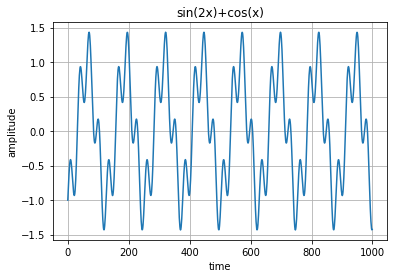

In [3]:
plt.grid()
plt.title('sin(2x)+cos(x)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

In [4]:
def seq2dataset(seq, window, horizon):
    X = []
    Y = []

    for i in range(len(seq)-(window+horizon)+1):
        x = seq[i:(i+window)]
        y = (seq[i+window+horizon-1])
        X.append(x)
        Y.append(y)

    return np.array(X), np.array(Y)

In [5]:
w = 20  # window size
h = 1  # horizon factor

X, Y = seq2dataset(seq_data, w, h)

print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [6]:
split_ratio = 0.8
split = int(split_ratio*len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [7]:
model = Sequential()

#model.add(SimpleRNN(units=128, activation='tanh',input_shape=x_train[0].shape))
model.add(SimpleRNN(units=128, activation='tanh',input_shape=(20,1)))
model.add(Dense(1))

In [8]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [9]:
from datetime import datetime
start_time = datetime.now()
hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))
end_time = datetime.now()
print('Elapsed Time => ', end_time-start_time)

Epoch 1/100
25/25 [==============================] - 1s 15ms/step - loss: 0.1354 - mae: 0.2456 - val_loss: 0.0129 - val_mae: 0.0950
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0063 - mae: 0.0640 - val_loss: 0.0030 - val_mae: 0.0466
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0023 - mae: 0.0367 - val_loss: 0.0013 - val_mae: 0.0246
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0013 - mae: 0.0280 - val_loss: 9.1551e-04 - val_mae: 0.0240
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 7.0528e-04 - mae: 0.0205 - val_loss: 5.0309e-04 - val_mae: 0.0167
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 4.4350e-04 - mae: 0.0156 - val_loss: 3.2885e-04 - val_mae: 0.0135
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 2.9803e-04 - mae: 0.0128 - val_loss: 1.9740e-04 - val_mae: 0.0100
Epoch 8/100
25/25 [==============================] - 0

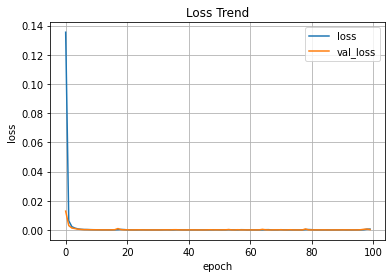

In [10]:
plt.title('Loss Trend')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(loc='best')
plt.show()

In [11]:
pred = model.predict(x_test)
print(pred.shape)

7/7 [==============================] - 0s 1ms/step
(196, 1)


In [12]:
rand_idx = np.random.randint(0, len(y_test), size=5)
print('random idx = ',rand_idx, '\n')
print('pred  = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

random idx =  [145 182 135 123  32] 

pred  =  [ 1.4180568  -0.2392776   0.67576224  0.7061245   0.27171037]
label =  [ 1.42966394 -0.23920114  0.6645118   0.69218882  0.25367797]


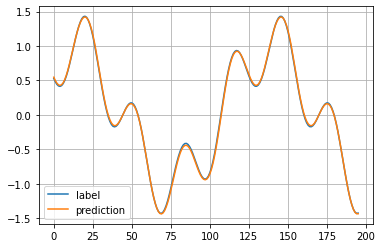

In [13]:
plt.plot(y_test, label='label')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')
plt.show()

y = 0.5*sin(2x) - cos(x/2)

In [14]:
# data 생성

x = np.arange(0, 100, 0.1)
y = 0.5*np.sin(2*x) - np.cos(x/2.0)

seq_data = y.reshape(-1,1)

print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]]


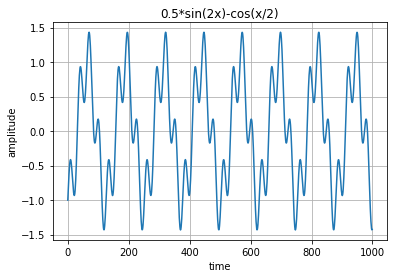

In [15]:
plt.grid()
plt.title('0.5*sin(2x)-cos(x/2)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

In [16]:
w = 20  # window size
h = 1  # horizon factor

X, Y = seq2dataset(seq_data, w, h)

print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [17]:
split_ratio = 0.8

split = int(split_ratio*len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [18]:
model = Sequential()

model.add(SimpleRNN(units=128, activation='tanh', input_shape=x_train[0].shape))

model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 128)               16640     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [20]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_train, y_train, 
                 epochs=100, 
                 validation_data=(x_test, y_test))

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 0.0582 - mae: 0.1825 - val_loss: 0.0111 - val_mae: 0.0929
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0056 - mae: 0.0612 - val_loss: 0.0020 - val_mae: 0.0377
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0017 - mae: 0.0337 - val_loss: 0.0012 - val_mae: 0.0273
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 7.6987e-04 - mae: 0.0226 - val_loss: 5.6532e-04 - val_mae: 0.0196
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 4.7418e-04 - mae: 0.0173 - val_loss: 3.8456e-04 - val_mae: 0.0164
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 3.2140e-04 - mae: 0.0143 - val_loss: 2.4570e-04 - val_mae: 0.0128
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 2.5163e-04 - mae: 0.0124 - val_loss: 2.5084e-04 - val_mae: 0.0126
Epoch 8/100
25/25 [==============================]

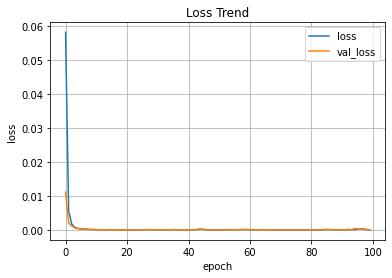

In [21]:
plt.title('Loss Trend')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(loc='best')

plt.show()

In [22]:
pred = model.predict(x_test)

print(pred.shape)

7/7 [==============================] - 0s 2ms/step
(196, 1)


In [23]:
rand_idx = np.random.randint(0, len(y_test), size=5)

print('random idx = ',rand_idx, '\n')

print('pred  = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

rand_idx = np.random.randint(0, len(y_test), size=5)

print('\n\nrandom idx = ',rand_idx, '\n')

print('pred  = ', pred.flatten()[rand_idx])
print('label = ', y_test.flatten()[rand_idx])

random idx =  [ 30 173  56 195  32] 

pred  =  [ 0.5023106   0.13649449 -0.20100269 -1.4250106   0.24953887]
label =  [ 0.50731935  0.13633806 -0.20078373 -1.42698617  0.25367797]


random idx =  [ 54 125 146 114  45] 

pred  =  [-0.00653212  0.56570417  1.4231395   0.8333879   0.03876198]
label =  [-0.00556474  0.56570501  1.42900005  0.83162584  0.03820471]


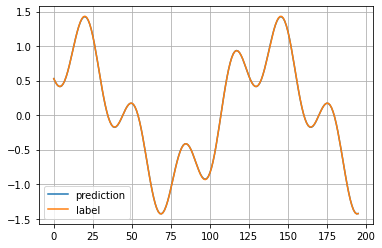

In [24]:
plt.plot(pred, label='prediction')
plt.plot(y_test, label='label')
plt.grid()
plt.legend(loc='best')

plt.show()